In [25]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold, cross_val_score


# Machine Learning Modelle

In [16]:
# Load the dataset
df = pd.read_csv("data/smoker_train.csv")
df = df.drop_duplicates()

# store test error and train error for each model
# [model, test_mse, train_mse, test_accuracy, train_accuracy, test_f1, train_f1]
model_errors = []

# Split the data into test and train sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

## Naives Modell

In [18]:
# Modell, das immer "Non-Smoker" (0) vorhersagt
y = df_train['smoking']
y_pred_naive = np.zeros_like(y)

# Fehlerwerte berechnen
accuracy = accuracy_score(y, y_pred_naive)
f1 = f1_score(y, y_pred_naive)
mse = mean_squared_error(y, y_pred_naive)

print(f"Accuracy (immer Non-Smoker): {accuracy:.4f}")
print(f"F1-Score (immer Non-Smoker): {f1:.4f}")
print(f"Mean Squared Error (immer Non-Smoker): {mse:.4f}")

# Fehlerwerte für testset berechnen
y_test = df_test['smoking']
y_test_pred_naive = np.zeros_like(y_test)
accuracy_test = accuracy_score(y_test, y_test_pred_naive)
f1_test = f1_score(y_test, y_test_pred_naive)
mse_test = mean_squared_error(y_test, y_test_pred_naive)

print(f"Test Accuracy (immer Non-Smoker): {accuracy_test:.4f}")
print(f"Test F1-Score (immer Non-Smoker): {f1_test:.4f}")
print(f"Test Mean Squared Error (immer Non-Smoker): {mse_test:.4f}")


model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])

Accuracy (immer Non-Smoker): 0.6361
F1-Score (immer Non-Smoker): 0.0000
Mean Squared Error (immer Non-Smoker): 0.3639
Test Accuracy (immer Non-Smoker): 0.6243
Test F1-Score (immer Non-Smoker): 0.0000
Test Mean Squared Error (immer Non-Smoker): 0.3757


## Linear Regression
Not relevant to smoker prediction.

In [ ]:
# Use all columns except 'weight(kg)' and smoking as features
X = df_train[['height(cm)', 'waist(cm)', 'age', 'hemoglobin']]
y = df_train['weight(kg)']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train_1, y_train_1)

y_pred = lr_model.predict(X_test_1)

print(f"Intercept: {lr_model.intercept_}")
for name, coef in zip(X.columns, lr_model.coef_):
    print(f"Coefficient for {name}: {coef}")

mse = mean_squared_error(y_test_1, y_pred)
print(f"Test Mean Squared Error: {mse}")

## Decision Tree

In [37]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle
dtc = DecisionTreeClassifier(random_state=0).fit(X, y)

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

# How many leafs does the tree have?
print(f"Number of leafs in the tree: {dtc.get_n_leaves()}")

# How deep is the tree?
print(f"Depth of the tree: {dtc.get_depth()}")

model_errors.append(['Decision Tree', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.6719
Decision Tree Train Accuracy: 1.0000
Decision Tree Test F1-Score: 0.5620
Decision Tree Train F1-Score: 1.0000
Decision Tree Test Mean Squared Error: 0.3281
Decision Tree Train Mean Squared Error: 0.0000
Number of leafs in the tree: 4238
Depth of the tree: 32


## Decision Tree limited leaves

In [ ]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle
dtc = DecisionTreeClassifier(random_state=0, max_leaf_nodes=7).fit(X, y)

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.7157
Decision Tree Train Accuracy: 0.7206
Decision Tree Test F1-Score: 0.5915
Decision Tree Train F1-Score: 0.5966
Decision Tree Test Mean Squared Error: 0.2843
Decision Tree Train Mean Squared Error: 0.2794


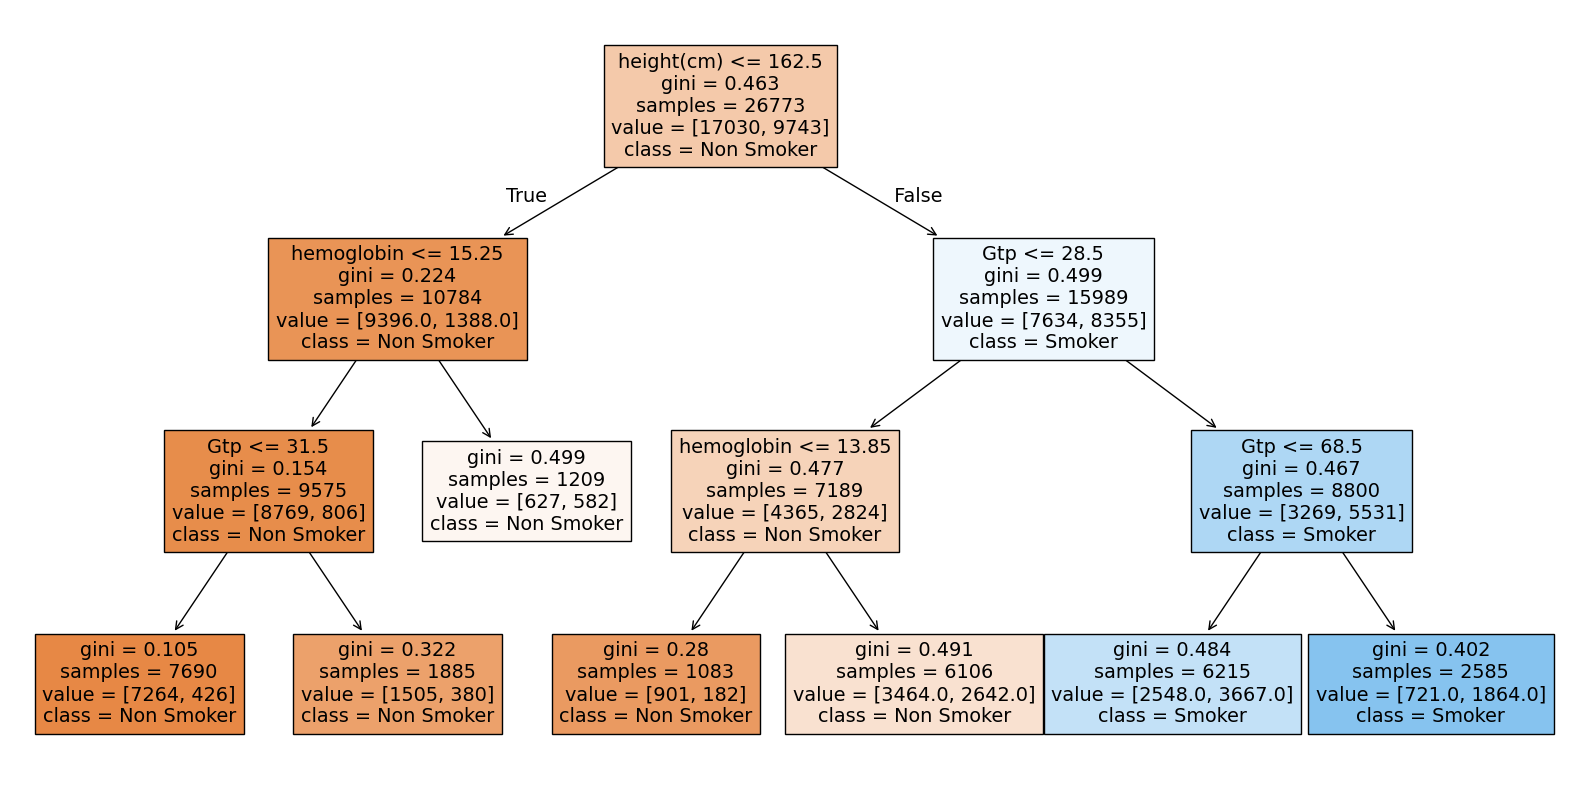

In [ ]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (max leaves)

In [48]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'max_leaf_nodes': [2, 5, 8, 9, 10, 11, 12, 17, 20]
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for max leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_leaf_nodes': 9}
Decision Tree Test Accuracy: 0.7186
Decision Tree Train Accuracy: 0.7250
Decision Tree Test F1-Score: 0.6080
Decision Tree Train F1-Score: 0.6154
Decision Tree Test Mean Squared Error: 0.2814
Decision Tree Train Mean Squared Error: 0.2750


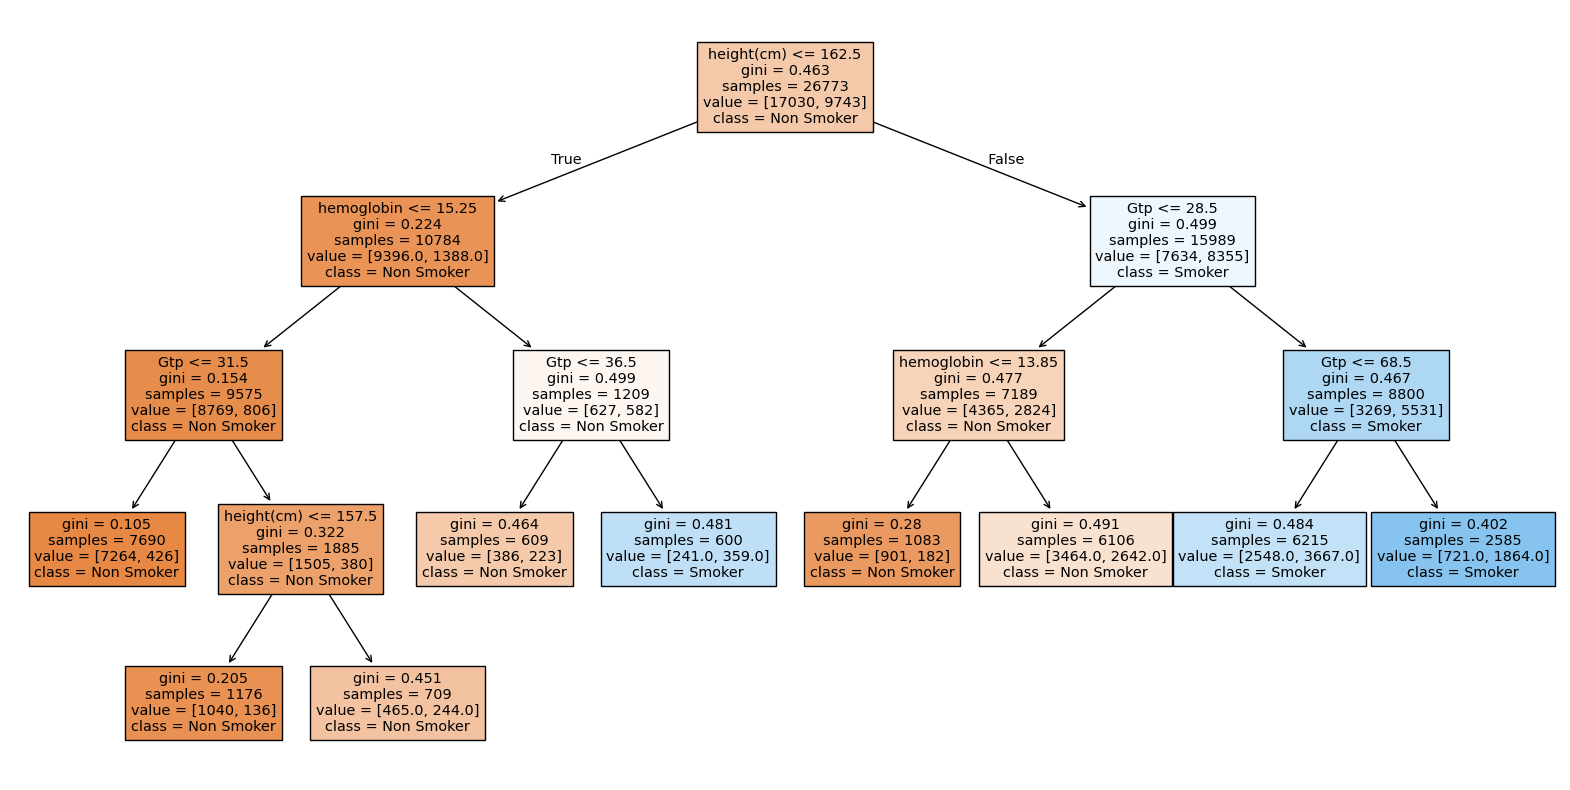

In [49]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.show()

## Decision Tree limited depth of 1

In [44]:

# Input Variablen
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)

# Output Variable
y = df_train['smoking']
y_test = df_test['smoking']

dtc = DecisionTreeClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

# Modellanwendung
y_pred_train = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree max depth of 1', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.6688
Decision Tree Train Accuracy: 0.6630
Decision Tree Test F1-Score: 0.6613
Decision Tree Train F1-Score: 0.6494
Decision Tree Test Mean Squared Error: 0.3312
Decision Tree Train Mean Squared Error: 0.3370


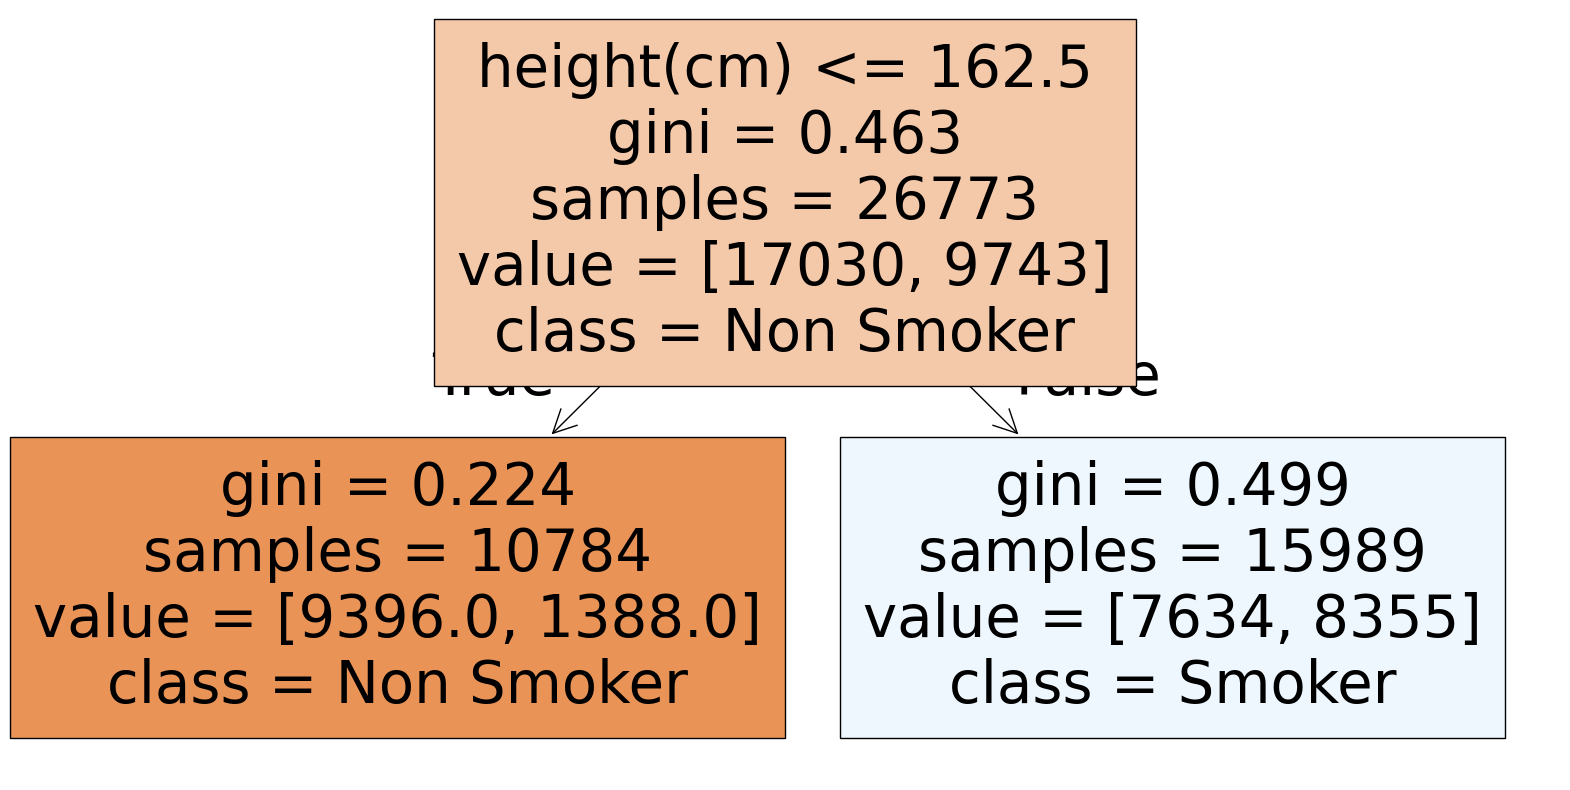

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (max depth)

In [54]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for max depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_depth': 3}
Decision Tree Test Accuracy: 0.7186
Decision Tree Train Accuracy: 0.7250
Decision Tree Test F1-Score: 0.6080
Decision Tree Train F1-Score: 0.6154
Decision Tree Test Mean Squared Error: 0.2814
Decision Tree Train Mean Squared Error: 0.2750


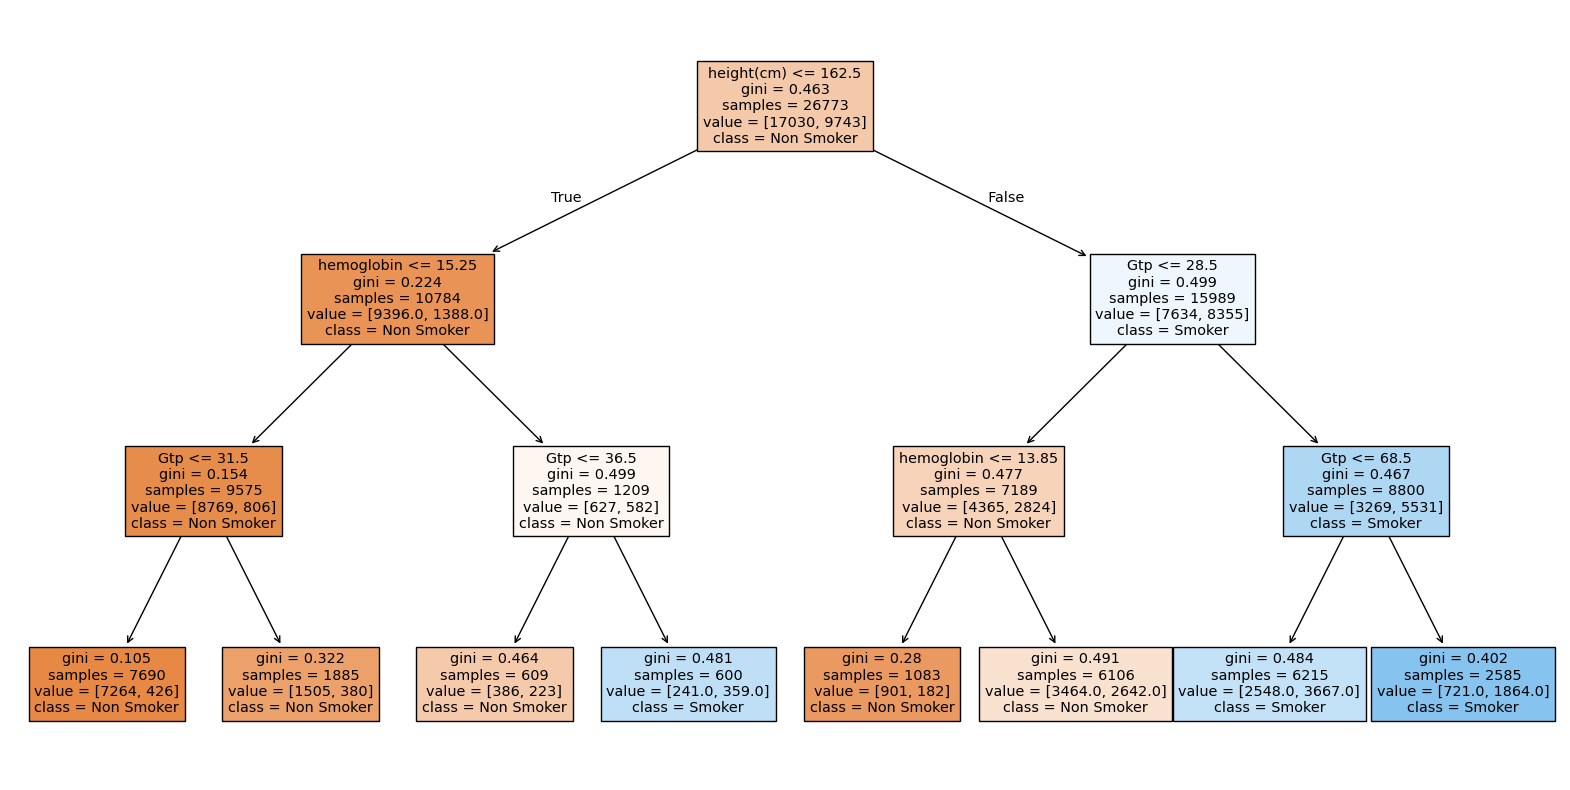

In [55]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (ccp_alpha)

In [59]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

path = dtc.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'ccp_alpha': ccp_alphas
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for ccp_alpha', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

KeyboardInterrupt: 

## SVC Modelle

In [ ]:
# Define features and target variable
X = df_train.drop('smoking', axis=1)
y = df_train['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Genauigkeit des besten Modells auf dem Testdatensatz: {accuracy:.4f}")
print(f"Genauigkeit des besten Modells auf dem Testdatensatz (f1): {f1:.4f}")


model_errors.append(['SVC', 0, 0, accuracy, accuracy_score(y_train, svc_model.predict(X_train)), f1, f1_score(y_train, svc_model.predict(X_train))])

In [ ]:
# Define features and target variable
X = df_train.drop('smoking', axis=1)
y = df_train['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVC model
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Genauigkeit des besten Modells auf dem Testdatensatz: {accuracy:.4f}")
print(f"Genauigkeit des besten Modells auf dem Testdatensatz (f1): {f1:.4f}")


model_errors.append(['Linear SVC', 0, 0, accuracy, accuracy_score(y_train, svc_model.predict(X_train)), f1, f1_score(y_train, svc_model.predict(X_train))])

In [ ]:
# # Define features and target variable
# X = df_train.drop('smoking', axis=1)
# y = df_train['smoking']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# svc=SVC() 



# # declare parameters for hyperparameter tuning
# parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]




# grid_search = GridSearchCV(estimator = svc,  
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5,
#                            verbose=0)


# grid_search.fit(X_train, y_train)

# y_pred = grid_search.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# print(f"Genauigkeit des besten Modells auf dem Testdatensatz: {accuracy:.4f}")
# print(f"Genauigkeit des besten Modells auf dem Testdatensatz (f1): {f1:.4f}")

 

## Model Evaluation

In [ ]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()